Задача 8


In [5]:
# -*- encoding: utf-8 -*-
%matplotlib inline

from scipy.stats import binom, expon, norm, uniform, rv_continuous
import matplotlib.pyplot as plt
import numpy as np

SAMPLE_SIZE=100

class binom_p_gen(rv_continuous):
    def _pdf(self, x):
        return 476.348 * x ** 7

def generate_binom(p, size=1000):
    return binom.rvs(50, p, size=size)

def estimate_binom(sample):
    result = []
    mean = sample[0]
    for i, s in enumerate(sample):
        mean = (i * mean + s) / float(i + 1)
        result.append(mean / 50)
    return result

def estimate_binom_2(sample):
    result = []
    minimum = sample[0]
    for i, s in enumerate(sample):
        minimum = min(minimum, s)
        result.append(minimum / 50.0)
    return result

def generate_expon(l, size=1000):
    return expon.rvs(scale=l, size=size)

def estimate_expon(sample):
    result = []
    sum = 0
    for i, s in enumerate(sample):
        sum += s
        if sum == 0:
            result.append(0)
        else:
            result.append(i / float(sum))
    return result

def estimate_expon_2(sample):
    result = []
    sum = 0
    minimum = sample[0]
    for i, s in enumerate(sample):
        sum += s
        minimum = min(minimum, s)
        result.append((i + 1) / (2.0 * sum) + (i + 1) / (2.0 * minimum))
    return result

def generate_norm(mu, size=1000):
    return norm.rvs(mu, 2.1, size=size)

def estimate_norm(sample):
    result = []
    sum = 0
    for i, s in enumerate(sample):
        sum += s
        result.append(s / (i + 1))
    return result

def estimate_norm_2(sample):
    result = []
    sr = []
    for i, s in enumerate(sample):
        sr = sorted(sr + [s])
        result.append(sr[len(sr) / 2])
    return result

def bootstrapped_variance(estimator, generator, estimate, sample_size):
    return np.var([estimate(generator(estimator, size=sample_size)) for _ in range(500)])

def calc_variances(param, generator, estimate):
    sample = generator(param, size=SAMPLE_SIZE)
    estimators = estimate(sample)
    vars = []
    for i, estimator in enumerate(estimators):
        vars.append(bootstrapped_variance(estimator, generator, estimate, sample_size=i+1))
    return vars

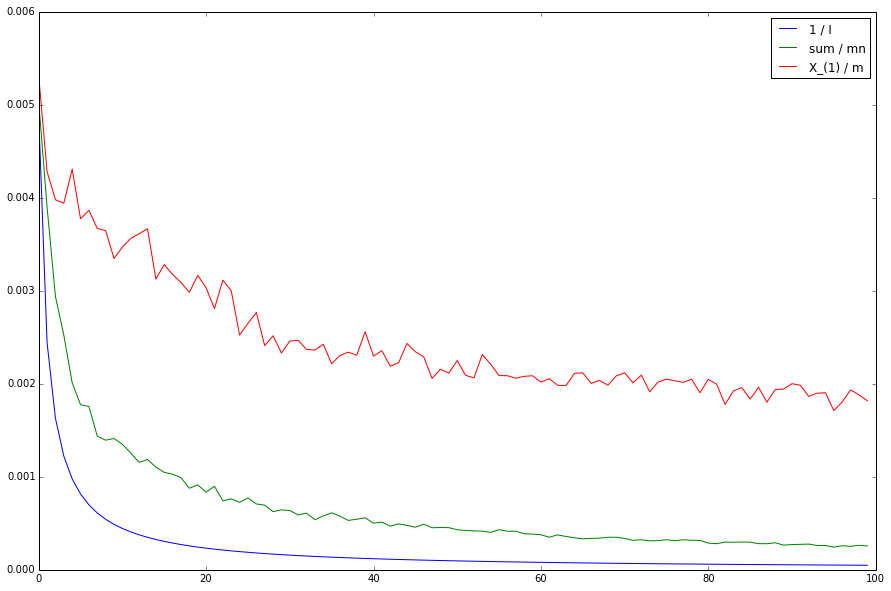

In [9]:
plt.figure(figsize=(15,10))
p = binom_p_gen(a=0.19, b=0.6).rvs(size=1)[0]
ns = np.array(range(SAMPLE_SIZE))
plt.plot(ns, p * (1 - p) / 50 / (ns + 1), label="1 / I")
plt.plot(ns, calc_variances(p, generate_binom, estimate_binom), label="sum / mn")
plt.plot(ns, calc_variances(p, generate_binom, estimate_binom_2), label="X_(1) / m")
plt.legend()
plt.show()

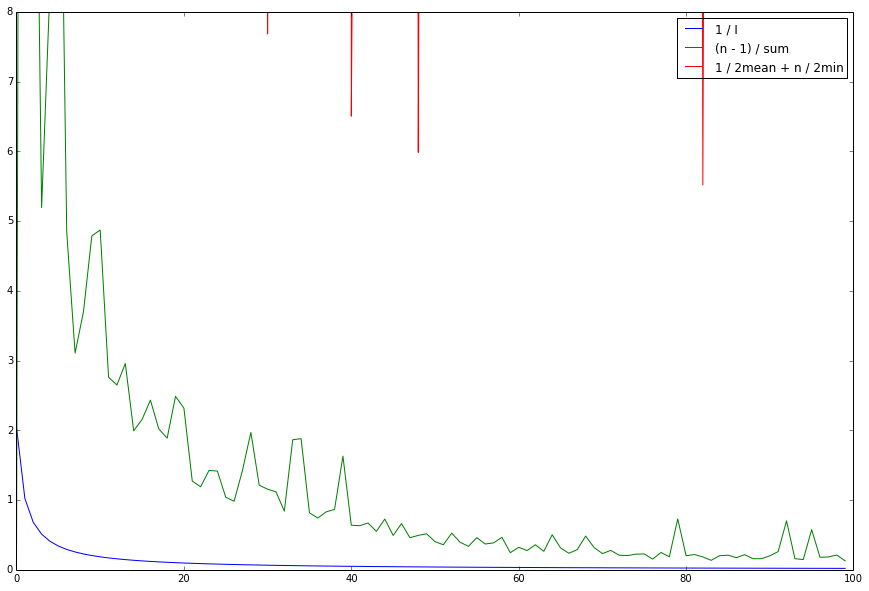

In [13]:
plt.figure(figsize=(15,10))
plt.axis([0, SAMPLE_SIZE, 0, 8])
l = uniform.rvs(loc=0.1, scale=2)
ns = np.array(range(SAMPLE_SIZE))
plt.plot(ns, l * l / (ns + 1), label="1 / I")
plt.plot(ns, calc_variances(l, generate_expon, estimate_expon), label="(n - 1) / sum")
plt.plot(ns, calc_variances(l, generate_expon, estimate_expon_2), label="1 / 2mean + n / 2min")
plt.legend()
plt.show()

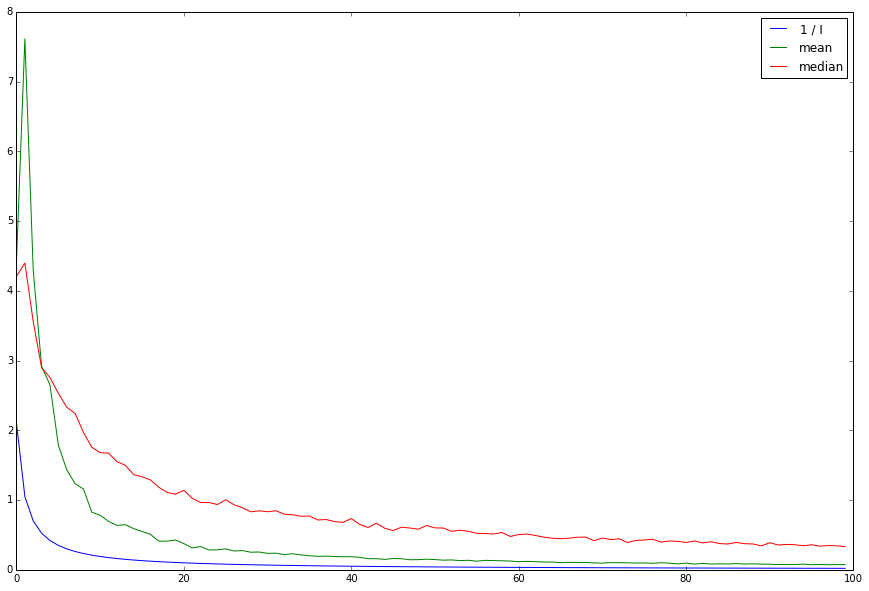

In [11]:
plt.figure(figsize=(15,10))
plt.axis([0, SAMPLE_SIZE, 0, 8])
mu = uniform.rvs(loc=-75, scale=74)
ns = np.array(range(SAMPLE_SIZE))
plt.plot(ns, 2.1 / (ns + 1), label="1 / I")
plt.plot(ns, calc_variances(mu, generate_norm, estimate_norm), label="mean")
plt.plot(ns, calc_variances(mu, generate_norm, estimate_norm_2), label="median")
plt.legend()
plt.show()